# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [90]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [91]:
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [92]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [94]:
cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [95]:
cancer_df.shape

(699, 11)

In [96]:
# From above it can be seen that Bare Nuclei column data type is shown as object as there is some incorrect data 
# which would be imputed in the later steps

In [97]:
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [98]:
# No descriptive analysis is seen for Bare Nuclei column because of the data issues

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [99]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(cancer_df.apply(num_missing, axis=0))

Missing values per column:
ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [100]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
# Replacing ? with NaN
cancer_df = cancer_df.replace('?', np.nan)

In [101]:
print("NaN values inserted in Bare Nuclei column:")
sum(cancer_df['Bare Nuclei'].isnull())

NaN values inserted in Bare Nuclei column:


16

In [102]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer_df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [103]:
# Replacing the NaN values in Bare Nuclei column with mode

cancer_df = cancer_df.apply(lambda x: x.fillna(x.mode()[0]),axis=0)

In [104]:
# Checking for NaN Values after replacement
print("NaN values after replacement in Bare Nuclei column:")
sum(cancer_df['Bare Nuclei'].isnull())

NaN values after replacement in Bare Nuclei column:


0

In [105]:
# Convertig the data type of Bare Nuclei column to int64
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')

In [106]:
# Checking the data types
cancer_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [107]:
# Descriptive Analysis after replacement
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [108]:
# Now statistics of Bare Nuclei column can be seen

In [109]:
# Dropping duplicate rows

cancer_df = cancer_df.drop_duplicates()

In [110]:
# 9 duplicate rows removed
cancer_df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable
# Dropping ID row
cancer_df = cancer_df.drop('ID',axis=1)

In [115]:
cancer_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\gopin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gopin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


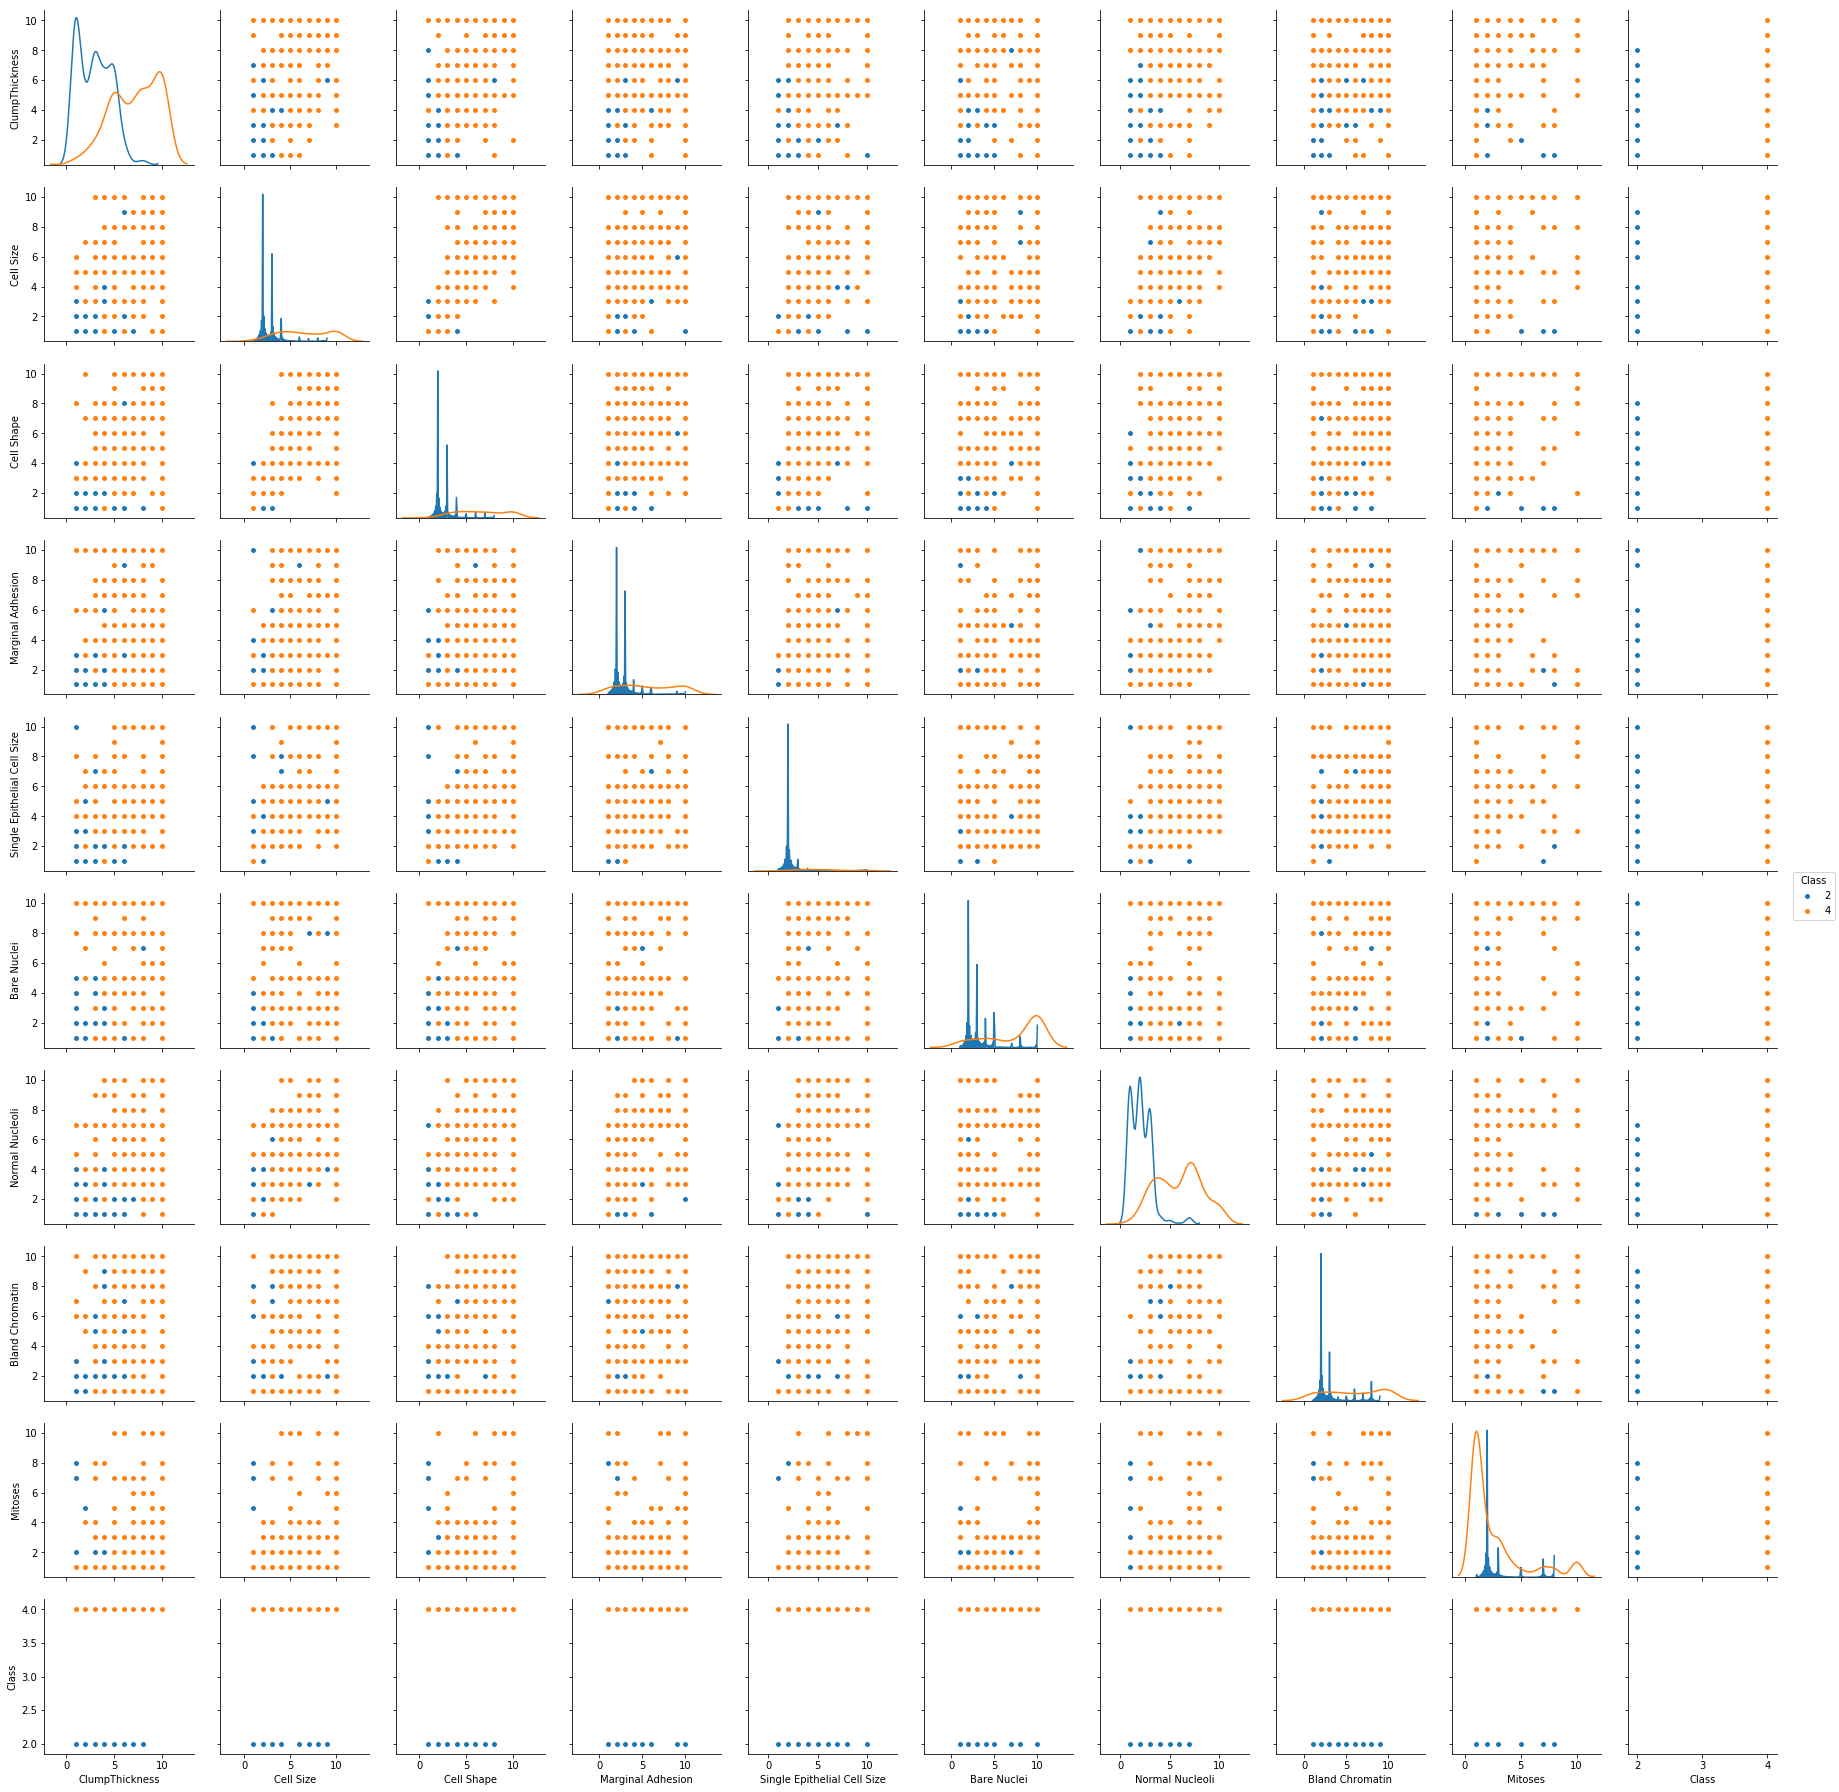

In [117]:
#Let us check for pair plots
sns.pairplot(cancer_df,diag_kind='kde',hue='Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

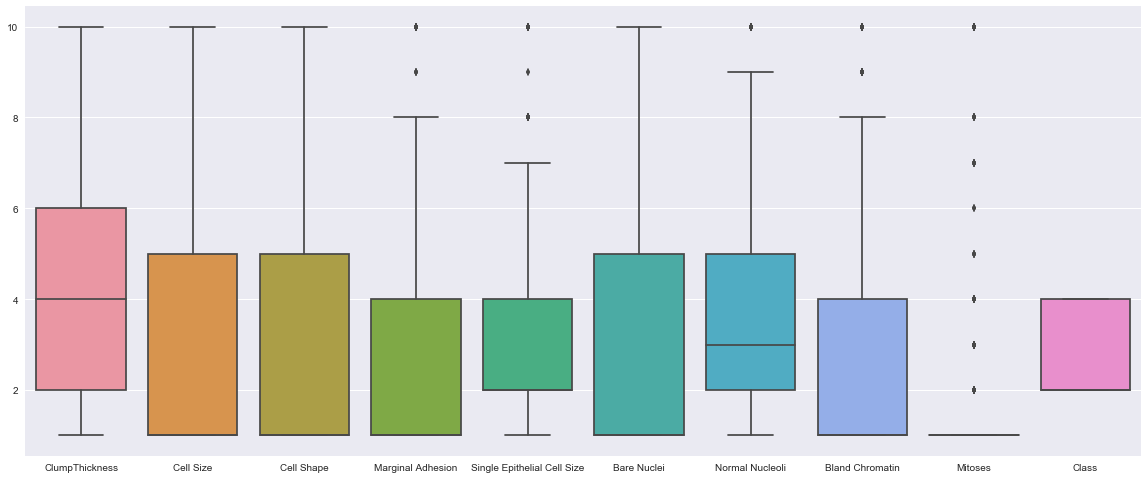

In [125]:
# We could see most of the outliers are now removed.

sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(data=cancer_df)

In [132]:
# Calculating Q1 for each column

Q1 = cancer_df.quantile(0.25)

# Calculating Q3 for each column

Q3 = cancer_df.quantile(0.75)

# calculating interquartileregion (IQR) for each column

IQR = Q3-Q1

# Identifying & Printing outliers

cancer_df_ol = cancer_df[(cancer_df < (Q1-1.5*IQR)) | (cancer_df > (Q3+1.5*IQR))].dropna(how='all')

cancer_df_ol.count() # Prints the no. of outlier values


ClumpThickness                   0
Cell Size                        0
Cell Shape                       0
Marginal Adhesion               60
Single Epithelial Cell Size     52
Bare Nuclei                      0
Normal Nucleoli                 20
Bland Chromatin                 77
Mitoses                        119
Class                            0
dtype: int64

In [133]:
cancer_df_ol.shape

(193, 10)

In [153]:
# Replacing outliers in the columns which has outliers 
# with the thresold values for Outlier (with Q1-1.5*IQR if < median and with Q3+1.5*IQR if > Median)

In [145]:
# Threshold Values

Left_df = Q1-1.5*IQR  ## Left side i.e if less than median
Right_df = Q3+1.5*IQR ## Right side i.e. if more than median

In [147]:
Left_df

ClumpThickness                -4.0
Cell Size                     -5.0
Cell Shape                    -5.0
Marginal Adhesion             -3.5
Single Epithelial Cell Size   -1.0
Bare Nuclei                   -5.0
Normal Nucleoli               -2.5
Bland Chromatin               -3.5
Mitoses                        1.0
Class                         -1.0
dtype: float64

In [148]:
Right_df

ClumpThickness                 12.0
Cell Size                      11.0
Cell Shape                     11.0
Marginal Adhesion               8.5
Single Epithelial Cell Size     7.0
Bare Nuclei                    11.0
Normal Nucleoli                 9.5
Bland Chromatin                 8.5
Mitoses                         1.0
Class                           7.0
dtype: float64

In [154]:
cancer_df['Single Epithelial Cell Size'] = np.where(cancer_df['Single Epithelial Cell Size'] > Right_df['Single Epithelial Cell Size'], Right_df['Single Epithelial Cell Size'],cancer_df['Single Epithelial Cell Size'])

In [155]:
cancer_df['Single Epithelial Cell Size'] = np.where(cancer_df['Single Epithelial Cell Size'] < Left_df['Single Epithelial Cell Size'], Left_df['Single Epithelial Cell Size'],cancer_df['Single Epithelial Cell Size'])

In [156]:
cancer_df['Marginal Adhesion'] = np.where(cancer_df['Marginal Adhesion'] > Right_df['Marginal Adhesion'], Right_df['Marginal Adhesion'],cancer_df['Marginal Adhesion'])

In [157]:
cancer_df['Marginal Adhesion'] = np.where(cancer_df['Marginal Adhesion'] < Left_df['Marginal Adhesion'], Left_df['Marginal Adhesion'],cancer_df['Marginal Adhesion'])

In [158]:
cancer_df['Normal Nucleoli'] = np.where(cancer_df['Normal Nucleoli'] > Right_df['Normal Nucleoli'], Right_df['Normal Nucleoli'],cancer_df['Normal Nucleoli'])

In [159]:
cancer_df['Normal Nucleoli'] = np.where(cancer_df['Normal Nucleoli'] < Left_df['Normal Nucleoli'], Left_df['Normal Nucleoli'],cancer_df['Normal Nucleoli'])

In [160]:
cancer_df['Bland Chromatin'] = np.where(cancer_df['Bland Chromatin'] > Right_df['Bland Chromatin'], Right_df['Bland Chromatin'],cancer_df['Bland Chromatin'])

In [161]:
cancer_df['Bland Chromatin'] = np.where(cancer_df['Bland Chromatin'] < Left_df['Bland Chromatin'], Left_df['Bland Chromatin'],cancer_df['Bland Chromatin'])

In [162]:
cancer_df['Mitoses'] = np.where(cancer_df['Mitoses'] > Right_df['Mitoses'], Right_df['Mitoses'],cancer_df['Mitoses'])

In [164]:
cancer_df['Mitoses'] = np.where(cancer_df['Mitoses'] < Left_df['Mitoses'], Left_df['Mitoses'],cancer_df['Mitoses'])

In [165]:
# Box plot after outlier adjustment

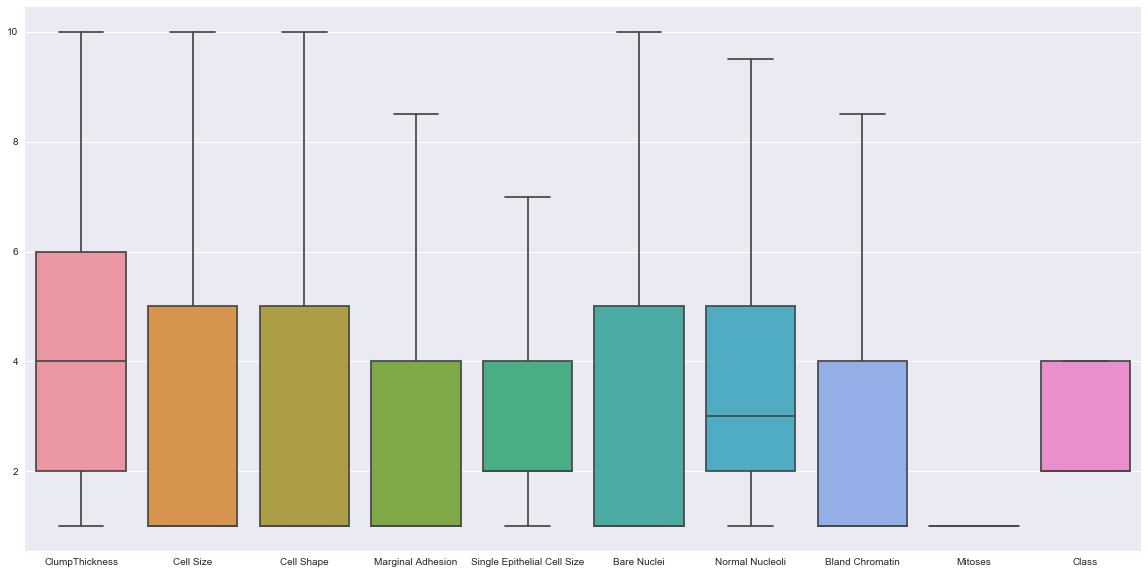

In [177]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=cancer_df)

In [167]:
# Standardising the independent variable data

X = cancer_df.drop('Class',axis=1)

In [169]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)

C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [171]:
X_std

array([[ 0.20282286, -0.70169775, -0.74503981, ..., -0.17539674,
        -0.63362989,  0.        ],
       [ 0.20282286,  0.28506471,  0.26891969, ..., -0.17539674,
        -0.26974756,  0.        ],
       [-0.50757194, -0.70169775, -0.74503981, ..., -0.17539674,
        -0.63362989,  0.        ],
       ...,
       [ 0.20282286,  2.25858965,  2.2968387 , ...,  1.90404914,
         2.09548763,  0.        ],
       [-0.15237454,  1.600748  ,  0.9448927 , ...,  2.5278829 ,
         1.18578179,  0.        ],
       [-0.15237454,  1.600748  ,  1.6208657 , ...,  2.5278829 ,
         0.45801711,  0.        ]])

# Q6 Create a covariance matrix for identifying Principal components

In [175]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00145138 0.64410677 0.65453792 0.50167717 0.54660373 0.59150555
  0.56498384 0.54618447 0.        ]
 [0.64410677 1.00145138 0.9066632  0.72800861 0.78174972 0.68556472
  0.76104659 0.73121148 0.        ]
 [0.65453792 0.9066632  1.00145138 0.70364309 0.75160088 0.70518656
  0.7400641  0.72792357 0.        ]
 [0.50167717 0.72800861 0.70364309 1.00145138 0.66418897 0.68583363
  0.68518449 0.62551067 0.        ]
 [0.54660373 0.78174972 0.75160088 0.66418897 1.00145138 0.6263289
  0.65988131 0.68920344 0.        ]
 [0.59150555 0.68556472 0.70518656 0.68583363 0.6263289  1.00145138
  0.67794772 0.59581302 0.        ]
 [0.56498384 0.76104659 0.7400641  0.68518449 0.65988131 0.67794772
  1.00145138 0.6767848  0.        ]
 [0.54618447 0.73121148 0.72792357 0.62551067 0.68920344 0.59581302
  0.6767848  1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [176]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eigenvectors)
print('\n Eigen Values \n', eigenvalues)

Eigen Vectors 
 [[ 0.30807853 -0.88645506 -0.00100346  0.04586918  0.19894213 -0.02931434
   0.27546611  0.02934579  0.        ]
 [ 0.38687872  0.04328544 -0.73870659  0.18714417 -0.35942906 -0.18962659
  -0.05421039 -0.31568118  0.        ]
 [ 0.38373285 -0.02167253  0.65949832  0.16072785 -0.53350564 -0.15545199
  -0.12702241 -0.25803031  0.        ]
 [ 0.34538274  0.33855378  0.05337579 -0.43941103  0.03282872 -0.19300708
   0.72828763  0.03779871  0.        ]
 [ 0.35382608  0.2110513   0.0797925   0.31842574  0.57062536 -0.54339684
  -0.25900814  0.18580642  0.        ]
 [ 0.34273109 -0.08927064 -0.07766991 -0.63976281 -0.1379223   0.04446369
  -0.50552768  0.42740996  0.        ]
 [ 0.35639767  0.12714708  0.05960212 -0.13899507  0.43429145  0.54876663
  -0.16122282 -0.5640883   0.        ]
 [ 0.34524708  0.16898864 -0.02393089  0.46254357 -0.11082357  0.55078437
   0.16126326  0.54412952  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         

# Q8 Find variance and cumulative variance by each eigen vector

In [180]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))] # Pair of eigen values and vectors

In [188]:
eig_pairs.sort() # Sorting as per eigen values
eig_pairs.reverse() # Making it Descending order

# Extracting the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigen values in descending order: \n%s' %eigvalues_sorted) # Eigen Values in descending order

Eigen values in descending order: 
[5.739487023879061, 0.5386732498331187, 0.45717325782829443, 0.3384417482765019, 0.30669789309692813, 0.28884455168309214, 0.2520914332867111, 0.09020187259525171, 0.0]


In [189]:
# Variance explained by each eigen vector

tot_var = sum(eigenvalues)

var_exp = [(i / tot_var) for i in sorted(eigenvalues, reverse=True)] # Variance explained by each vector 

cum_var_exp = np.cumsum(var_exp)  # Cumulative variance array

In [190]:
var_exp

[0.7163961158428751,
 0.06723657049547438,
 0.05706383598617657,
 0.04224390662364306,
 0.038281675424598434,
 0.0360532420488497,
 0.03146576042292461,
 0.011258893155458041,
 0.0]

In [192]:
cum_var_exp

array([0.71639612, 0.78363269, 0.84069652, 0.88294043, 0.9212221 ,
       0.95727535, 0.98874111, 1.        , 1.        ])

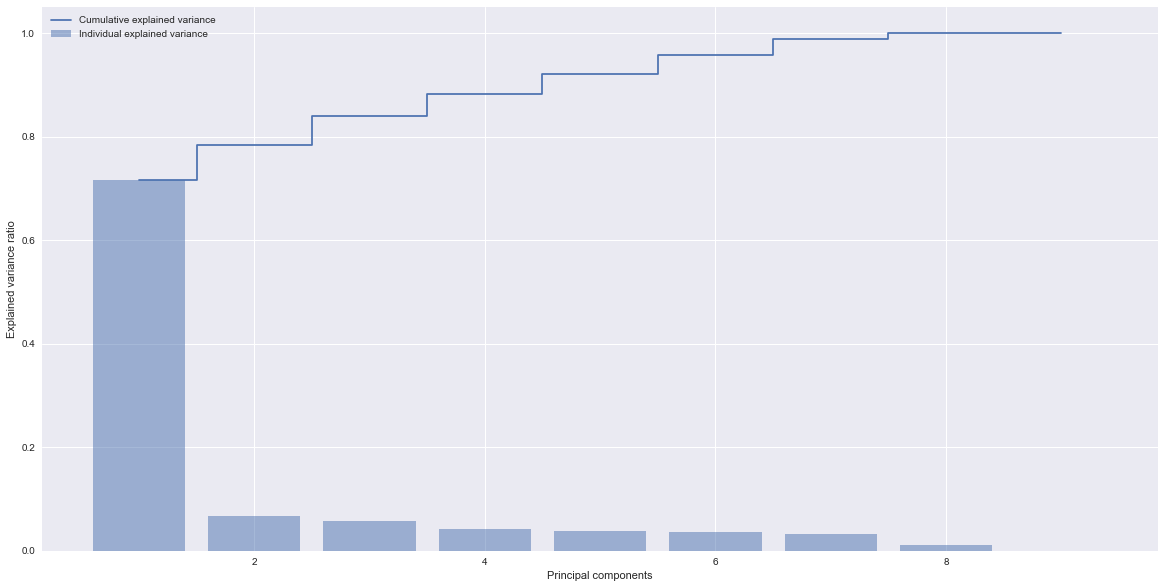

In [195]:
plt.bar(range(1,10), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [198]:
# As the variance of 92% is being explaind by first 5 components, considering 5 components for transformation

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [196]:
from sklearn.decomposition import PCA

In [197]:
X_centered = X_std - X_std.mean(axis=0)

In [199]:
pca = PCA(n_components=5)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [200]:
X_pca = pca.transform(X_centered)

In [201]:
X_pca = pd.DataFrame(X_pca)  # converting array to dataframe for pairplot

In [203]:
X_pca.head()

,0,1,2,3,4
0,-1.450044,-0.611435,0.031375,-0.217019,0.254846
1,1.837348,0.371685,-0.828503,1.653219,-1.018442
2,-1.574079,-0.006401,-0.178212,-0.250145,0.157443
3,1.696371,-0.463702,1.517767,-0.334338,-0.066089
4,-1.290967,-0.033372,-0.326523,-0.077384,0.235884


In [204]:
X_pca.shape

(690, 5)

# Q10 Find correlation between components and features

In [209]:
# Adding Class column to the converted data set
X_pca['Class'] = cancer_df['Class']

In [210]:
X_pca.head()

,0,1,2,3,4,Class
0,-1.450044,-0.611435,0.031375,-0.217019,0.254846,2.0
1,1.837348,0.371685,-0.828503,1.653219,-1.018442,2.0
2,-1.574079,-0.006401,-0.178212,-0.250145,0.157443,2.0
3,1.696371,-0.463702,1.517767,-0.334338,-0.066089,2.0
4,-1.290967,-0.033372,-0.326523,-0.077384,0.235884,2.0


In [211]:
X_pca.corr()

,0,1,2,3,4,Class
0,1.000000e+00,6.143274e-15,-3.215779e-16,-5.796914e-16,6.266842e-16,0.269888
1,6.143274e-15,1.000000e+00,6.124733e-17,-1.324627e-16,-2.220041e-16,-0.129905
2,-3.215779e-16,6.124733e-17,1.000000e+00,-5.081402e-16,-3.706162e-16,0.022336
3,-5.796914e-16,-1.324627e-16,-5.081402e-16,1.000000e+00,2.170618e-16,0.037575
4,6.266842e-16,-2.220041e-16,-3.706162e-16,2.170618e-16,1.000000e+00,-0.156470
Class,2.698882e-01,-1.299050e-01,2.233563e-02,3.757541e-02,-1.564703e-01,1.000000


C:\Users\gopin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gopin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


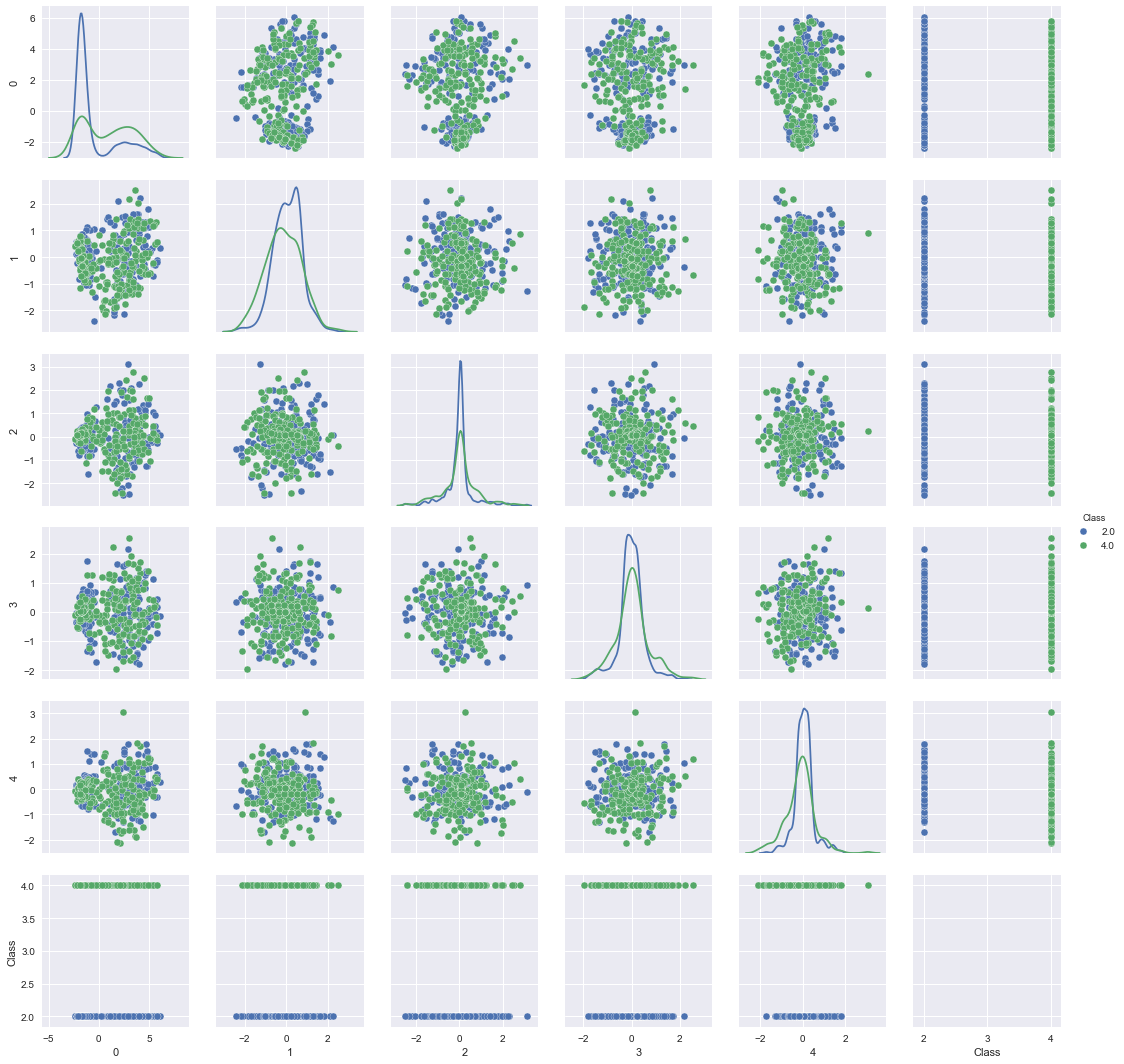

In [212]:
#Let us check for pair plots of the components
sns.pairplot(X_pca,diag_kind='kde',hue='Class')

In [220]:
# Correlation between Components and Features

# 1st Feature
X_pca.corrwith(pd.DataFrame(X_std)[0])

0        0.737536
1       -0.650136
2        0.030992
3        0.017041
4       -0.016240
Class    0.279741
dtype: float64

In [221]:
# 2nd Feature
X_pca.corrwith(pd.DataFrame(X_std)[1])

0        0.926182
1        0.031746
2        0.126445
3        0.110237
4        0.174698
Class    0.229756
dtype: float64

In [222]:
# 3rd Feature
X_pca.corrwith(pd.DataFrame(X_std)[2])

0        0.918651
1       -0.015895
2        0.108597
3        0.090370
4        0.142794
Class    0.243857
dtype: float64

In [223]:
# 4th Feature
X_pca.corrwith(pd.DataFrame(X_std)[3])

0        0.826841
1        0.248299
2       -0.296891
3        0.112202
4       -0.020918
Class    0.175788
dtype: float64

In [224]:
# 5th Feature
X_pca.corrwith(pd.DataFrame(X_std)[4])

0        0.847055
1        0.154787
2        0.215146
3        0.315896
4       -0.102826
Class    0.239725
dtype: float64

In [225]:
# 6th Feature
X_pca.corrwith(pd.DataFrame(X_std)[5])

0        0.820493
1       -0.065472
2       -0.432259
3       -0.025848
4       -0.236529
Class    0.267131
dtype: float64

In [226]:
# 7th Feature
X_pca.corrwith(pd.DataFrame(X_std)[6])

0        0.853211
1        0.093251
2       -0.093913
3       -0.319018
4        0.312167
Class    0.153607
dtype: float64

In [227]:
# 8th Feature
X_pca.corrwith(pd.DataFrame(X_std)[7])

0        0.826517
1        0.123938
2        0.312520
3       -0.320191
4       -0.301122
Class    0.246465
dtype: float64

In [228]:
# 9th Feature
X_pca.corrwith(pd.DataFrame(X_std)[8])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
Class   NaN
dtype: float64

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.